In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

# Logistic regression

In [2]:
data = pd.read_csv('turnover_data.csv')

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
log_model = smf.logit('churn ~ number_project + time_spend_company + number_project + work_accident + promotion_last_5years + average_montly_hours  + salary', data=data)
result = log_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.503743
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14991
Method:                           MLE   Df Model:                            7
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                 0.08220
Time:                        22:50:53   Log-Likelihood:                -7555.6
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                4.677e-288
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.8705      0.152    -25.498      0.000      -4.168      -3.573
salary[T.low]             1.9163      0.121     15.867      0.000       1.680       2.153
salary[T.medium]          1.3828      0.122     11.363      0.000       1.144       1.621
number_project           -0.0791      0.018     -4.390      0.000      -0.114      -0.044
time_spend_company        0.2618      0.014     19.186      0.000       0.235       0.289
work_accident            -1.5105      0.084    -17.890      0.000      -1.676      -1.345
promotion_last_5years    -1.4849      0.244     -6.091      0.000      -1.963      -1.007
average_montly_hours      0.0031      0.000      7.032      0.000       0.002       0.004
=========================================================================================
"""

In [4]:
result.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  churn
Method:                          dydx
At:                           overall
=========================================================================================
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
salary[T.low]             0.3185      0.020     16.149      0.000       0.280       0.357
salary[T.medium]          0.2298      0.020     11.445      0.000       0.190       0.269
number_project           -0.0131      0.003     -4.399      0.000      -0.019      -0.007
time_spend_company        0.0435      0.002     19.995      0.000       0.039       0.048
work_accident            -0.2510      0.014    -18.286      0.000      -0.278      -0.224
promotion_last_5years    -0.2468      0.040     -6.105      0.000      -0.326      -0.168
average_montly_hours      0.0005   7.38e-05      7.070      0.000       0.000       0.001
=========================================================================================
"""

Unit increase in average monthly hours an employee works is expected to increase probability of churn by 0.06 %.
Unit increase in years an employee has spent in a company is expected to increase probability of churn by 4.13%. 
Unit increase in number of project an employee conducts is expected to decrease the probability of churn by 1.2%.
People getting low or medium salary have more chance to churn the company than thos who get high salary. The probability  is increased by 23-32%.
People having work accident have 25% less chance to churn the company than those who don't have.
People who have got promotion during last 5 years are 25% less likely to leave than those who haven't got.

# Decision tree / Classification tree

In [5]:
data = pd.get_dummies(data, columns = ['salary'], prefix = "dummy")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,dummy_high,dummy_low,dummy_medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


In [6]:
from sklearn.model_selection import train_test_split

X = data[["satisfaction_level", "last_evaluation","number_project", "time_spend_company", "dummy_low", "dummy_medium" ]]
y = data.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1500, random_state=42)

In [7]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(max_depth = 2, criterion = "gini")
dt_clf = dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

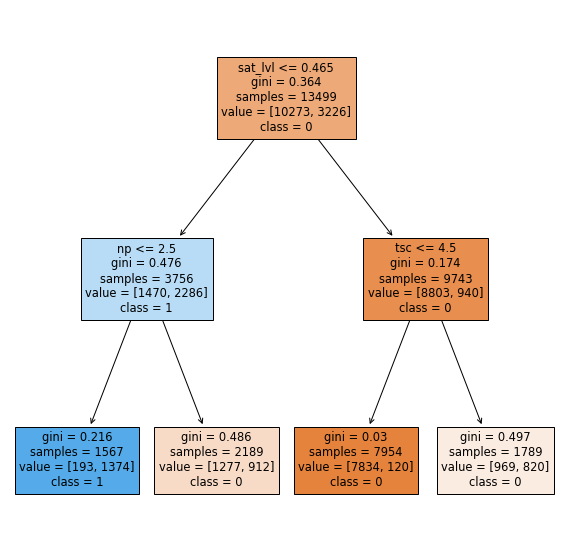

In [8]:
feature_names = ["sat_lvl", "last_eval", "np", "tsc", "low", "medium" ]
class_names = ["0", "1"]

fig = plt.figure(figsize=(10,10))
plot = tree.plot_tree(dt_clf, 
               feature_names=feature_names,
               class_names=class_names,
               filled=True)

In [9]:
# accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8626666666666667

In [10]:
# precision == specificity
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8971428571428571

In [11]:
# recall == sensitivity
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.45507246376811594

<AxesSubplot:>

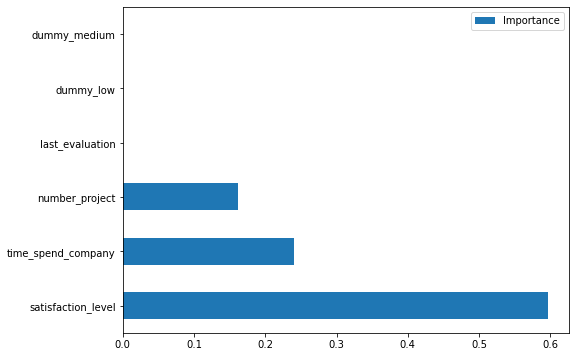

In [12]:
feat_importances = pd.DataFrame(dt_clf.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='barh', figsize=(8,6))

# Bagging

In [13]:
from sklearn import ensemble

bag_model = ensemble.BaggingClassifier(n_estimators=100, random_state = 42)
bag_model.fit(X_train, y_train)
print(bag_model)

BaggingClassifier(n_estimators=100, random_state=42)


In [14]:
expected_y  = y_test
predicted_y = bag_model.predict(X_test) 

In [15]:
# recall == sensitivity
from sklearn.metrics import recall_score

recall_score(expected_y, predicted_y)

0.9710144927536232

In [16]:
# precision == specificity
from sklearn.metrics import precision_score

precision_score(expected_y, predicted_y)

0.9738372093023255

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(DecisionTreeClassifier())
clf.fit(X_train, y_train)

feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)
feature_importances

array([0.53137441, 0.1761102 , 0.11386267, 0.1696628 , 0.00516187,
       0.00382806])

<AxesSubplot:>

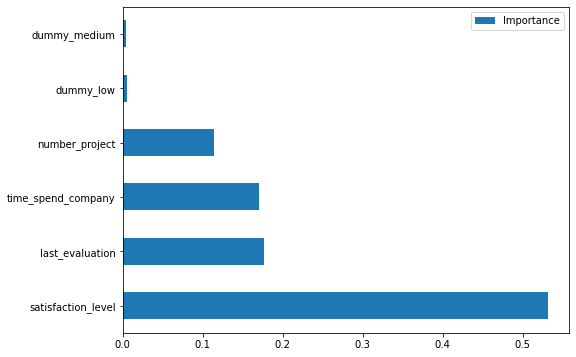

In [18]:
feat_importances = pd.DataFrame(feature_importances, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='barh', figsize=(8,6))

# Random Forests

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
expected_y  = y_test
predicted_y = rf_model.predict(X_test) 

In [22]:
# precision == specificity
from sklearn.metrics import precision_score

precision_score(expected_y, predicted_y)

0.9766081871345029

In [23]:
# recall == sensitivity
from sklearn.metrics import recall_score

recall_score(expected_y, predicted_y)

0.9681159420289855

In [24]:
rf_model.feature_importances_

array([0.40457912, 0.16128003, 0.20281463, 0.2201426 , 0.00766483,
       0.00351878])

<AxesSubplot:>

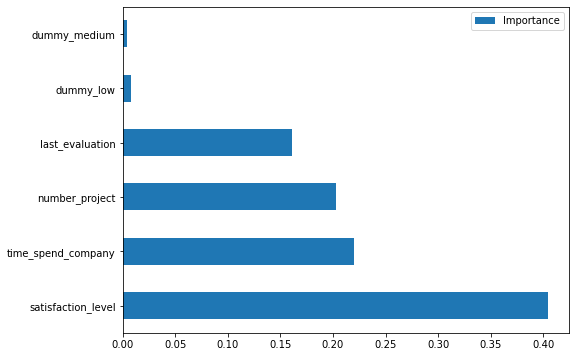

In [25]:
feat_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='barh', figsize=(8,6))

# Survival analysis

In [26]:
data_s = pd.read_csv('turnover_data.csv')
data_s

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


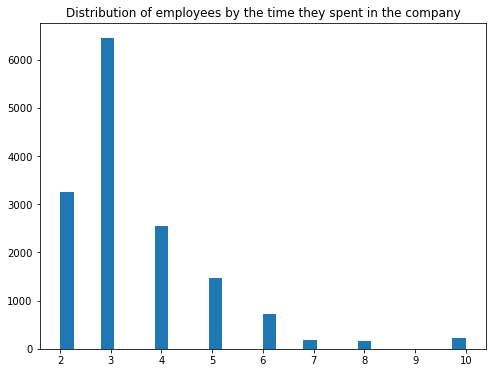

In [27]:
T = data_s["time_spend_company"]
E = data_s["churn"]
plt.figure( figsize=(8,6))
plt.hist(T, bins = 30)
plt.title("Distribution of employees by the time they spent in the company")
plt.show()

Text(0.5, 1.0, 'Kaplan-Meier Estimate -Survival Curve')

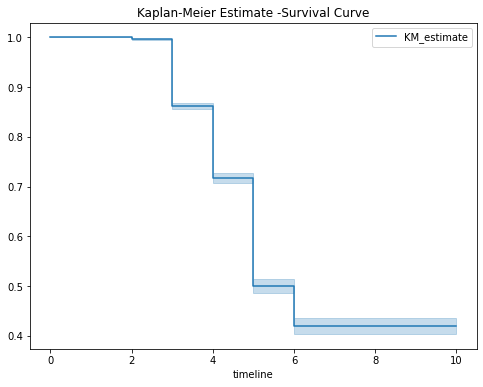

In [28]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
plt.figure( figsize=(8,6))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Estimate -Survival Curve")

In [29]:
from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

6.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                     5.0                     6.0


In [30]:
data_s = pd.get_dummies(data_s, columns = ['salary'], prefix = "dummy")
data_s.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,dummy_high,dummy_low,dummy_medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


Text(0.5, 1.0, 'Survival of different salary groups')

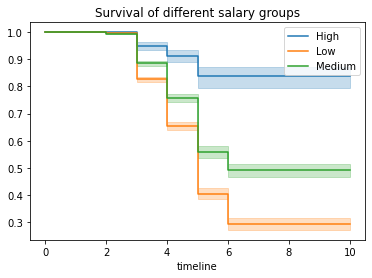

In [31]:
ax = plt.subplot(111)
m = (data_s["dummy_high"] == 1)
r = (data_s["dummy_low"] == 1)
k = (data_s["dummy_medium"] == 1)

kmf.fit(durations = T[m], event_observed = E[m], label = "High")
kmf.plot_survival_function(ax = ax)
kmf.fit(T[r], event_observed = E[r], label = "Low")
kmf.plot_survival_function(ax = ax)
kmf.fit(T[k], event_observed = E[k], label = "Medium")
kmf.plot_survival_function(ax = ax)
plt.title("Survival of different salary groups")

#, at_risk_counts = True

In [32]:
group1=data_s[data_s['dummy_medium']==1]
group2=data_s[data_s['dummy_high']==1]
T=group1['time_spend_company']
E=group1['churn']
T1=group2['time_spend_company']
E1=group2['churn']

#logrank_test
from lifelines.statistics import logrank_test
results=logrank_test(T,T1,event_observed_A=E, event_observed_B=E1)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         125.35 <0.005     94.24